In [49]:
!pip install streamlit
!npm install -g localtunnel


/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 2.301s


In [71]:
#unzipping the zip file into the colab
from google.colab import drive
import zipfile
import os

# Path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/data.zip'

# Directory to extract the contents of the zip file
extract_to_directory = '/content/extracted_files'

# Create the directory if it doesn't exist
os.makedirs(extract_to_directory, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

print("Extraction completed.")

Extraction completed.


In [55]:
## Import necessary libraries
import pandas as pd
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import os

In [56]:
# Ensure NLTK data is downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [57]:
# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [58]:
# Function to map POS tags to WordNet tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'):
        return 'r'
    else:
        return 'n'


In [59]:
# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalnum()]  # Remove non-alphanumeric tokens
    tokens = [token for token in tokens if token.lower() not in stop_words]  # Remove stopwords
    tokens = pos_tag(tokens)  # POS tagging
    tokens = [lemmatizer.lemmatize(token.lower(), pos=get_wordnet_pos(pos)) for token, pos in tokens]
    return ' '.join(tokens)


In [60]:
# Function to read HTML files and extract text from tables
data = []
labels = []

def read_html_files(directory, label):
    for filename in os.listdir(directory):
        if filename.endswith(".html"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='utf-8') as file:
                soup = BeautifulSoup(file, 'html.parser')
                tables = soup.find_all('table')
                for table in tables:
                    text = table.get_text(separator=" ", strip=True)
                    preprocessed_text = preprocess_text(text)
                    data.append(preprocessed_text)
                    labels.append(label)


In [61]:
# Paths to directories containing HTML files
directories = {
    "Income Statements": "//content/extracted_files/data/Income Statement",
    "Balance Sheets": "/content/extracted_files/data/Balance Sheets",
    "Cash Flows": "/content/extracted_files/data/Cash Flow",
    "Notes": "/content/extracted_files/data/Notes",
    "Others": "/content/extracted_files/data/Others"
}

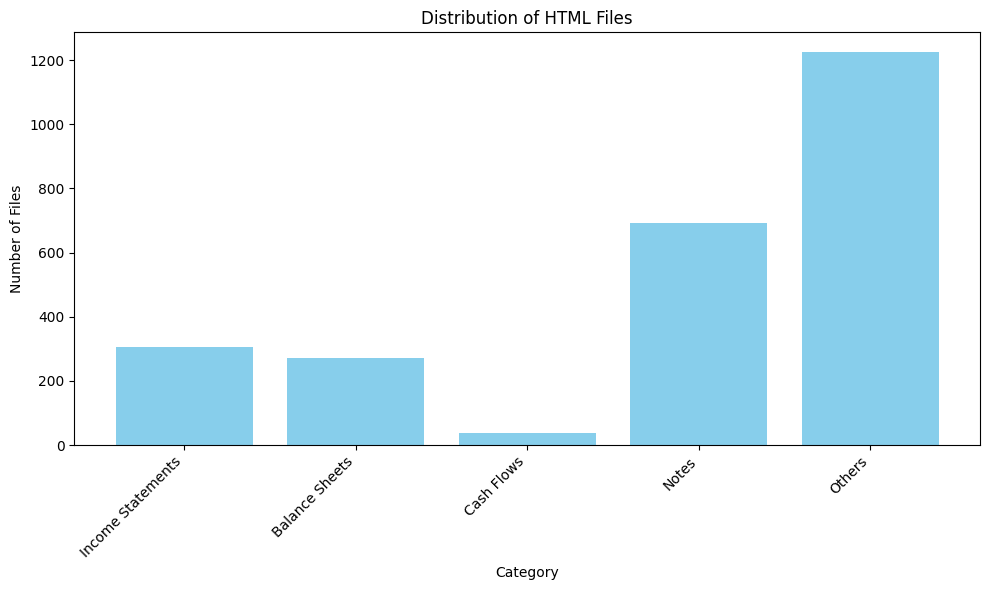

In [70]:
import matplotlib.pyplot as plt

# Count the number of files in each category
file_counts = {category: len(os.listdir(directory)) for category, directory in directories.items()}

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(file_counts.keys(), file_counts.values(), color='skyblue')
plt.title('Distribution of HTML Files')
plt.xlabel('Category')
plt.ylabel('Number of Files')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [62]:
# Read files from each category
for label, directory in directories.items():
    read_html_files(directory, label)


In [63]:
# Create a DataFrame
df = pd.DataFrame({"text": data, "label": labels})

# Display the DataFrame
print(df.head())

                                                text              label
0  consolidatec particular 3 month end financial ...  Income Statements
1  quarter end year end particular 7 7 7 unaudite...  Income Statements
2  particular three month end audited three month...  Income Statements
3  1 111 titulars quarter end year end march 31 2...  Income Statements
4  particular 3 month end 31st march 2018 refer n...  Income Statements


In [72]:
df.tail(5)

,text,label
2520,quarter end year end consolidated segment info...,Others
2521,sr name entity relationship 1rb ahmedabad vado...,Others
2522,name entity relationship ambuja cement limit p...,Others
2523,particular hil standalone plus utkal consolida...,Others
2524,revenue r cr fy17 fy18 mix yoy international 1...,Others


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Save the trained model and vectorizer
import joblib
joblib.dump(model, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


Accuracy: 0.9405940594059405
Classification Report:
                    precision    recall  f1-score   support

   Balance Sheets       1.00      1.00      1.00        58
       Cash Flows       1.00      0.88      0.93         8
Income Statements       0.90      0.91      0.90        57
            Notes       0.92      0.89      0.91       123
           Others       0.94      0.96      0.95       259

         accuracy                           0.94       505
        macro avg       0.95      0.93      0.94       505
     weighted avg       0.94      0.94      0.94       505



['vectorizer.pkl']

In [67]:
# Write Streamlit Script to app.py
%%writefile app.py
import streamlit as st
import joblib
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk

# Ensure NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Load the trained model and vectorizer
model = joblib.load("/content/model.pkl")
vectorizer = joblib.load("/content/vectorizer.pkl")

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to map POS tags to WordNet tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'):
        return 'r'
    else:
        return 'n'

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalnum()]  # Remove non-alphanumeric tokens
    tokens = [token for token in tokens if token.lower() not in stop_words]  # Remove stopwords
    tokens = pos_tag(tokens)  # POS tagging
    tokens = [lemmatizer.lemmatize(token.lower(), pos=get_wordnet_pos(pos)) for token, pos in tokens]
    return ' '.join(tokens)

# Streamlit application
st.title("Financial Statement Classification")

uploaded_file = st.file_uploader("Upload an HTML file", type=["html"])

if uploaded_file is not None:
    # Parse uploaded HTML file
    soup = BeautifulSoup(uploaded_file, 'html.parser')
    tables = soup.find_all('table')

    predictions = []
    for i, table in enumerate(tables):
        text = table.get_text(separator=" ", strip=True)
        preprocessed_text = preprocess_text(text)
        text_tfidf = vectorizer.transform([preprocessed_text])
        prediction = model.predict(text_tfidf)
        predictions.append(prediction[0])

    st.write("Predicted Labels for Tables:")
    for i, prediction in enumerate(predictions):
        st.write(f"Table {i+1}: {prediction}")


Overwriting app.py


In [68]:
#it will generate the IP address to access the streamlit application
!wget -q -O - ipv4.icanhazip.com

34.125.109.36


In [69]:
# Run the Streamlit app
!streamlit run app.py &>/content/logs.txt &

# Use localtunnel to expose the Streamlit app
!lt --port 8501

#use the IP address to access the streamlit application


your url is: https://small-geese-stick.loca.lt
^C
